In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!pip install pywaffle

# Importing necessary Liberaries

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pywaffle import Waffle
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import sklearn.naive_bayes as nb
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay


# Loading Dataset

In [42]:
dataset = pd.read_csv('/content/drive/MyDrive/codesoft/t3/IRIS.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing & Visualization

In [43]:
dataset.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


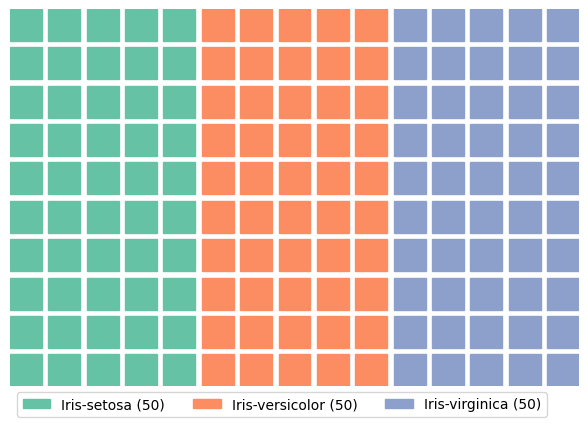

In [44]:
fig = plt.figure(
                 FigureClass = Waffle,
                 rows = 10, columns = 15,
                 values = dataset['species'].value_counts(),
                 cmap_name = 'Set2',
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(dataset['species'].unique(),dataset['species'].value_counts())],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                )
plt.show()

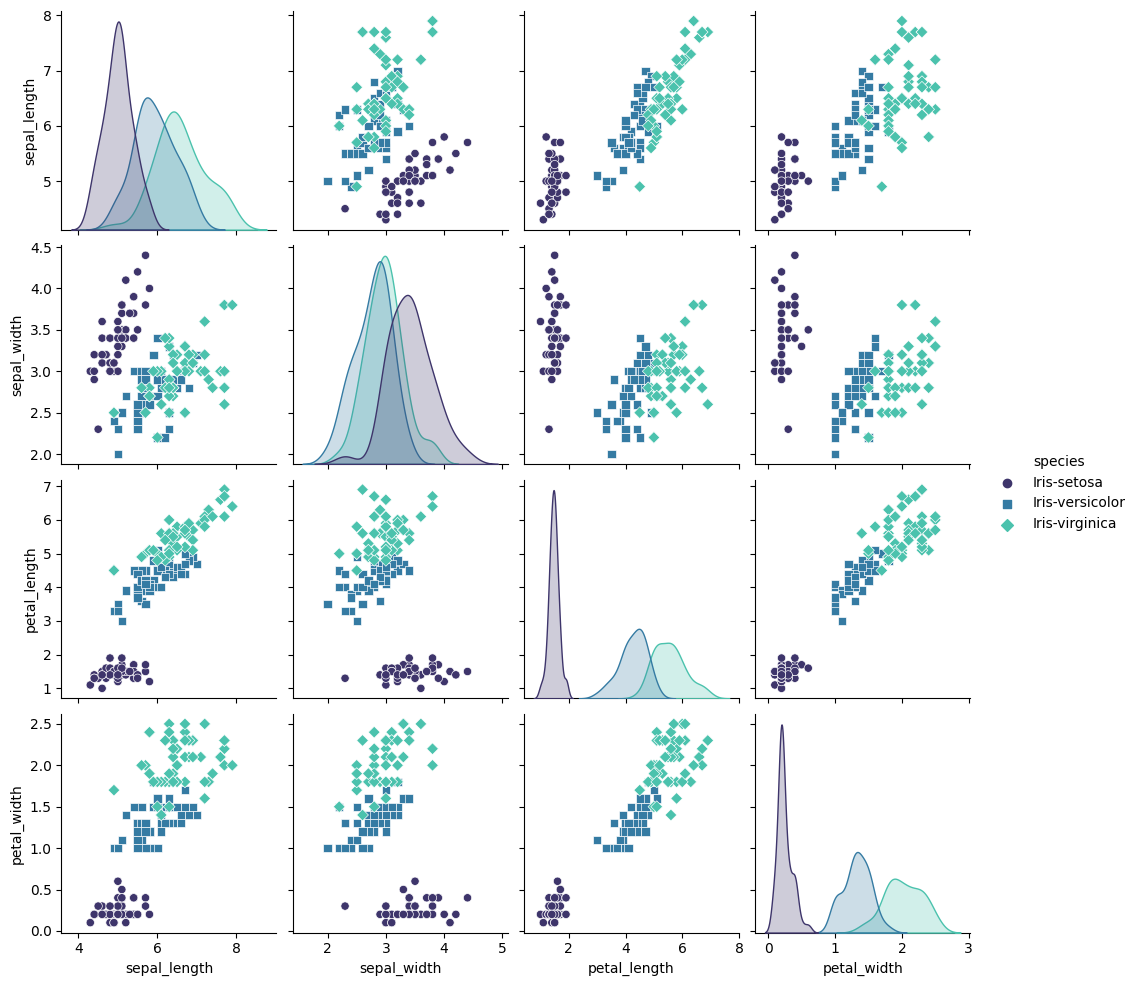

In [45]:
sns.pairplot(dataset,hue='species',palette="mako",markers=["o", "s", "D"])
plt.show()

In [46]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
num_data =  dataset.copy()
num_data['species'] = num_data["species"].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}).astype(int)
num_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
num_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: ylabel='petal_width'>

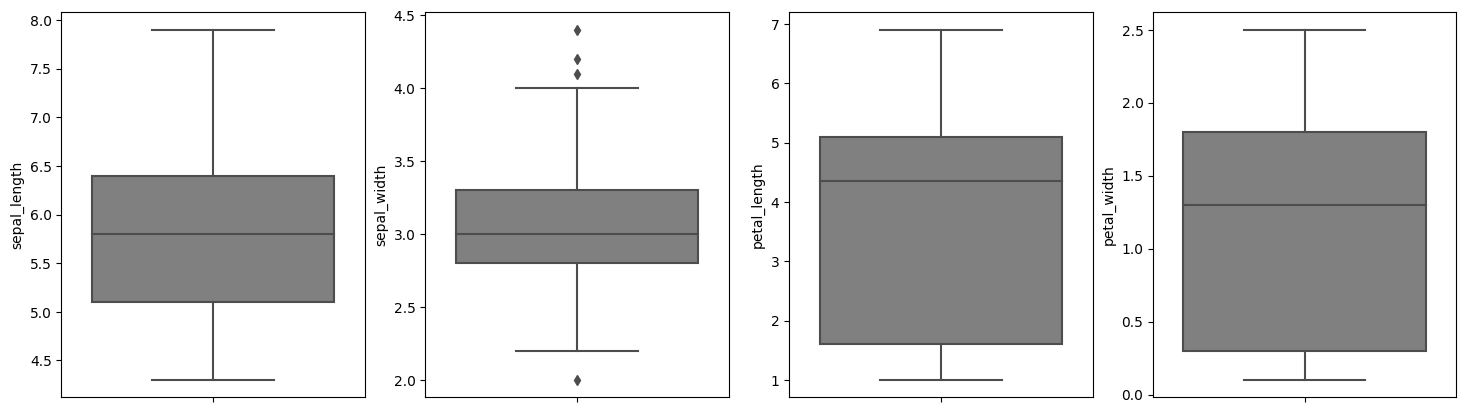

In [49]:
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=4)
sns.boxplot(data=num_data, y="sepal_length", ax=ax[0], color='gray')
sns.boxplot(data=num_data, y="sepal_width", ax=ax[1], color='gray')
sns.boxplot(data=num_data, y="petal_length", ax=ax[2], color='gray')
sns.boxplot(data=num_data, y="petal_width", ax=ax[3], color='gray')

### Droping outliers

In [50]:
num_data = num_data[num_data['sepal_width']<4]
num_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: ylabel='petal_width'>

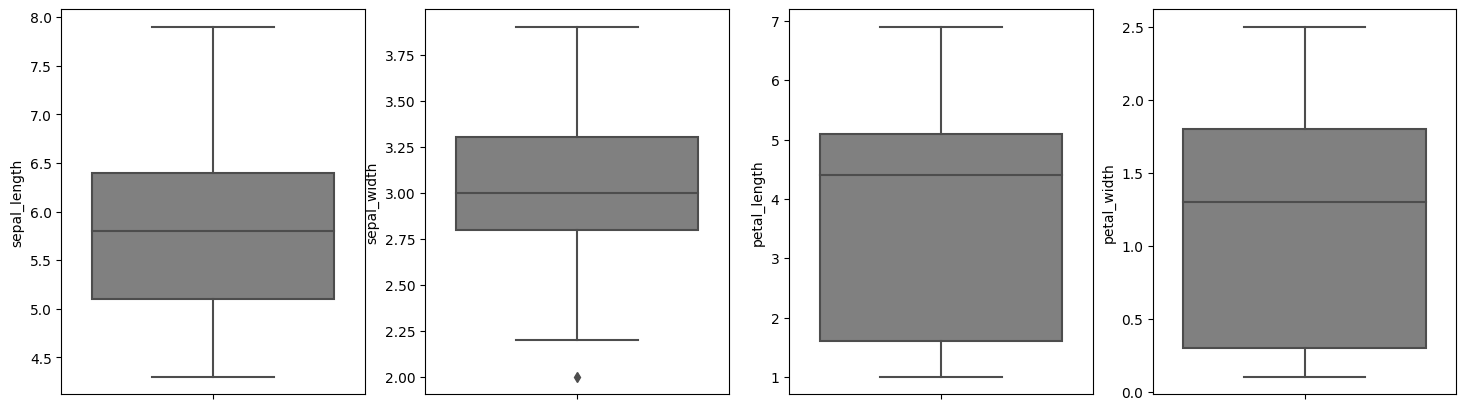

In [51]:
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=4)
sns.boxplot(data=num_data, y="sepal_length", ax=ax[0], color='gray')
sns.boxplot(data=num_data, y="sepal_width", ax=ax[1], color='gray')
sns.boxplot(data=num_data, y="petal_length", ax=ax[2], color='gray')
sns.boxplot(data=num_data, y="petal_width", ax=ax[3], color='gray')

In [52]:
X = num_data.iloc[:,:-1]
y = num_data.iloc[:,-1]

In [53]:
y.shape

(146,)

# Modeling

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2,random_state=0)

log = LogisticRegression(random_state = 0)
log_score = cross_val_score(log, X_train, y_train, cv=5)
y_log = log.fit(X_train,y_train).predict(X_test)

DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_score = cross_val_score(DT, X_train, y_train, cv=5)
y_DT = DT.fit(X_train,y_train).predict(X_test)

SV = SVC(kernel = 'linear', random_state = 0)
SV_score = cross_val_score(SV, X_train, y_train, cv=5)
y_SV = SV.fit(X_train,y_train).predict(X_test)

NB = nb.GaussianNB()
NB_score = cross_val_score(NB, X_train, y_train, cv=5)
y_NB = NB.fit(X_train,y_train).predict(X_test)

RF = RandomForestClassifier(min_samples_split = 10,  random_state=0)
RF_score = cross_val_score(RF, X_train, y_train, cv=5)
y_RF = RF.fit(X_train,y_train).predict(X_test)

KNN =  KNeighborsClassifier(3)
KNN_score = cross_val_score(KNN, X_train, y_train, cv=5)
y_KNN = KNN.fit(X_train,y_train).predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
models =  ["Logistic Regression","Decision Tree","Support vector machine","Naive Bayes", "Random Forest","kNN"]
cr_vs = [log_score, DT_score, SV_score, NB_score, RF_score, KNN_score]
y_preds = [y_log, y_DT, y_SV, y_NB, y_RF,y_KNN]

In [56]:
def evalute(model_name, cr_v , y_pred):
      for i in range(len(model_name)):
        print(model_name[i] + ":\n")
        print("    Cross Validation Mean  = {} % \n ".format(round(cr_v[i].mean()*100,2)))
        print("    Cross Validation Max  = {} % \n ".format(round(np.max(cr_v[i])*100,2)))
        print("    Test Accuracy  = {} % \n\n".format(round(accuracy_score(y_test,y_pred[i])*100,2)))

In [57]:
def confusion_m(y_pred):
      cm = confusion_matrix(y_pred,y_test,  labels = [0,1,2])
      disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset['species'].unique())
      disp.plot()


In [58]:
evalute(models,cr_vs,y_preds)

Logistic Regression:

    Cross Validation Mean  = 94.86 % 
 
    Cross Validation Max  = 100.0 % 
 
    Test Accuracy  = 100.0 % 


Decision Tree:

    Cross Validation Mean  = 92.25 % 
 
    Cross Validation Max  = 95.65 % 
 
    Test Accuracy  = 100.0 % 


Support vector machine:

    Cross Validation Mean  = 97.39 % 
 
    Cross Validation Max  = 100.0 % 
 
    Test Accuracy  = 100.0 % 


Naive Bayes:

    Cross Validation Mean  = 93.99 % 
 
    Cross Validation Max  = 100.0 % 
 
    Test Accuracy  = 96.67 % 


Random Forest:

    Cross Validation Mean  = 94.86 % 
 
    Cross Validation Max  = 100.0 % 
 
    Test Accuracy  = 100.0 % 


kNN:

    Cross Validation Mean  = 94.82 % 
 
    Cross Validation Max  = 100.0 % 
 
    Test Accuracy  = 100.0 % 




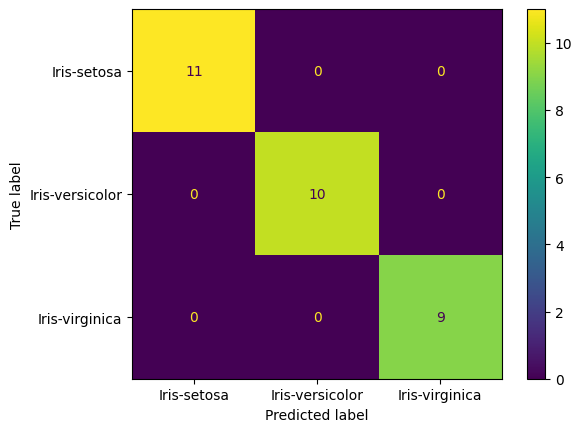

In [59]:
confusion_m(y_log)